<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn import svm
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
!pip install missingpy
import missingpy
from missingpy import MissForest
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.impute import KNNImputer
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data_file_path = os.path.join(path,'dataset2.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data = pd.read_csv(data_file_path) #อ่านไฟล์ csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
data

,No.,LabNo,Sex,AgeSYear,Enose,Overall,Body shape age,Kidney,Heart,Liver,...,071_HbA1c,CK,LD-P,AMY7,TP1,DBIL,TBIL,ALB1,GGT,homocysteine
0,1.0,NaN,2,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8,79.0,231.0,59.0,7.16,0.10,0.30,4.48,11.0,10.88
1,2.0,201807163166.00,1,49.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.11
2,3.0,201807163167,1,44.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,85.0,175.0,104.0,7.43,0.15,1.26,4.70,15.0,11.94
3,4.0,201807163168,2,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.01
4,5.0,201807163169,2,38.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,57.0,177.0,89.0,7.11,0.02,0.20,3.92,24.0,8.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,NaN,V17,2,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,NaN,V19,2,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,NaN,V20,1,28.0,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,NaN,V21,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.dropna(subset=['telomere length (kb) '], inplace = True)
data.drop(['No.', 'LabNo','DHEAs (BRIA)'], axis=1,inplace = True)
data.drop(data.columns[2: 10], axis=1,inplace = True)
data.drop(data.columns[27:37], axis=1,inplace = True)
data.drop('telomere length (kb) ',1,inplace = True)

<ipython-input-23-1a7942661c33>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('telomere length (kb) ',1,inplace = True)


In [24]:
data

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,47.2,156.0,19.4,112.0,64.0,70.0,NaN,NaN,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2,57.0,47.4,153.0,20.2,114.0,75.0,69.0,19.3,12.5,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2,24.0,53.2,157.0,21.6,103.0,69.0,78.0,21.3,14.6,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2,62.0,54.4,165.0,20.0,95.0,75.0,83.0,21.6,15.2,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2,86.0,49.0,154.0,20.7,129.0,79.0,83.0,NaN,NaN,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2,25.0,47.0,165.0,17.3,104.0,63.0,89.0,NaN,NaN,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,NaN
2269,2,31.0,72.2,168.0,25.6,123.0,89.0,69.0,NaN,NaN,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,NaN
2270,2,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,NaN
2272,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,NaN


In [25]:
data.isna().sum()

Sex                          0
AgeSYear                     0
Weight                       8
Height                       8
BMI                          8
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
dtype: int64

In [26]:
print(f'10% = {int(423*10/100)}')
print(f'20% = {int(423*20/100)}')
print(f'30% = {int(423*30/100)}')
print(f'40% = {int(423*40/100)}')
print(f'50% = {int(423*50/100)}')
print(f'60% = {int(423*60/100)}')

10% = 42
20% = 84
30% = 126
40% = 169
50% = 211
60% = 253


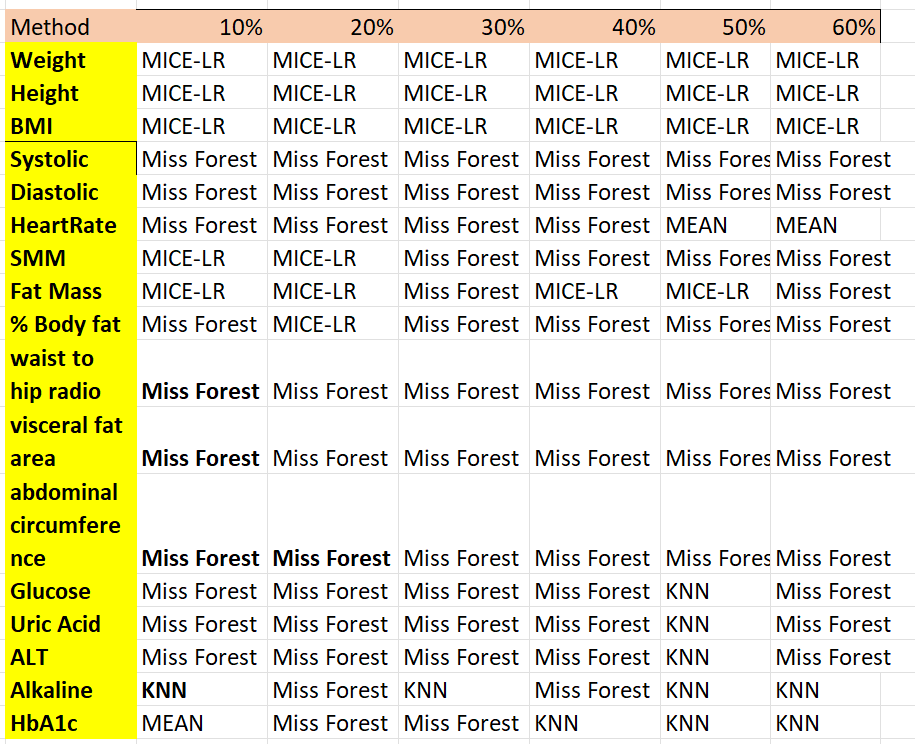

In [27]:
data1 = data.copy()
data1

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,47.2,156.0,19.4,112.0,64.0,70.0,NaN,NaN,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2,57.0,47.4,153.0,20.2,114.0,75.0,69.0,19.3,12.5,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2,24.0,53.2,157.0,21.6,103.0,69.0,78.0,21.3,14.6,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2,62.0,54.4,165.0,20.0,95.0,75.0,83.0,21.6,15.2,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2,86.0,49.0,154.0,20.7,129.0,79.0,83.0,NaN,NaN,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2,25.0,47.0,165.0,17.3,104.0,63.0,89.0,NaN,NaN,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,NaN
2269,2,31.0,72.2,168.0,25.6,123.0,89.0,69.0,NaN,NaN,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,NaN
2270,2,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,NaN
2272,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,NaN


## data.iloc[:, 2:5] by MiCE-LR imputation
LR = LinearRegression model

In [28]:
for i in data1:
  if i == 'Systolic':
    break
  else:
    lr = LinearRegression()
    imp = IterativeImputer(estimator= lr , max_iter= 10, verbose=2, imputation_order='roman',initial_strategy = 'mean')
    data1[i] = imp.fit_transform(data1[[i]])
  

In [29]:
data1

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2.0,58.0,47.200000,156.00000,19.400000,112.0,64.0,70.0,NaN,NaN,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2.0,57.0,47.400000,153.00000,20.200000,114.0,75.0,69.0,19.3,12.5,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2.0,24.0,53.200000,157.00000,21.600000,103.0,69.0,78.0,21.3,14.6,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2.0,62.0,54.400000,165.00000,20.000000,95.0,75.0,83.0,21.6,15.2,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2.0,86.0,49.000000,154.00000,20.700000,129.0,79.0,83.0,NaN,NaN,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2.0,25.0,47.000000,165.00000,17.300000,104.0,63.0,89.0,NaN,NaN,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,NaN
2269,2.0,31.0,72.200000,168.00000,25.600000,123.0,89.0,69.0,NaN,NaN,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,NaN
2270,2.0,32.0,58.608675,162.00241,22.240723,NaN,NaN,NaN,NaN,NaN,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,NaN
2272,1.0,29.0,58.608675,162.00241,22.240723,NaN,NaN,NaN,NaN,NaN,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,NaN


In [30]:
data1.isna().sum()

Sex                          0
AgeSYear                     0
Weight                       0
Height                       0
BMI                          0
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
dtype: int64

## data.iloc[:,5:24] by Miss Forest imputation

In [ ]:
list1 = []
for i in data1:
  if i == '013_Alkaline Phos':
    break
  else:
    list1.append(i)
    MF = MissForest()
    MF_imput = MF.fit_transform(data1[list1].copy())

In [32]:
data2= pd.DataFrame(MF_imput)
data2 = data2.rename(columns={0: 'Sex' ,1: 'AgeSYear', 2:'Weight',3:'Height',4:'BMI',5:'Systolic',6:'Diastolic',7:'HeartRate',8:'SMM',9:'Fat Mass',
                                10:'% Body fat',11:'waist to hip radio',12:'abdominal circumference',13:'visceral fat area',14:'Glucose',15:'BUN',16:'Creatinine',17:'Uric Acid',18:'Cholesterol',
                                19:'Triglyceride',20:'HDL-C',21:'LDL',22:'AST',23:'ALT',24:'Alkaline Phos',25:'HbA1c'})

data2

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Glucose,BUN,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT
0,2.0,58.0,47.200000,156.00000,19.400000,112.00,64.00,70.00,19.759,13.643,...,100.0,10.0,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0
1,2.0,57.0,47.400000,153.00000,20.200000,114.00,75.00,69.00,19.300,12.500,...,81.0,15.0,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0
2,2.0,24.0,53.200000,157.00000,21.600000,103.00,69.00,78.00,21.300,14.600,...,79.0,12.0,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0
3,2.0,62.0,54.400000,165.00000,20.000000,95.00,75.00,83.00,21.600,15.200,...,89.0,17.0,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0
4,2.0,86.0,49.000000,154.00000,20.700000,129.00,79.00,83.00,19.971,13.865,...,108.0,9.0,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.0,25.0,47.000000,165.00000,17.300000,104.00,63.00,89.00,20.455,12.451,...,82.0,15.0,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0
419,2.0,31.0,72.200000,168.00000,25.600000,123.00,89.00,69.00,25.362,19.939,...,85.0,15.0,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0
420,2.0,32.0,58.608675,162.00241,22.240723,115.73,72.58,74.05,23.347,22.623,...,94.0,10.0,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0
421,1.0,29.0,58.608675,162.00241,22.240723,114.32,75.68,87.35,27.360,21.051,...,80.0,23.0,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0


In [33]:
data1.iloc[:,5:24] = data2.iloc[:,5:24]

In [34]:
data1

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2.0,58.0,47.200000,156.00000,19.400000,112.00,64.00,70.00,19.759,13.643,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2.0,57.0,47.400000,153.00000,20.200000,114.00,75.00,69.00,19.300,12.500,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2.0,24.0,53.200000,157.00000,21.600000,103.00,69.00,78.00,21.300,14.600,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2.0,62.0,54.400000,165.00000,20.000000,95.00,75.00,83.00,21.600,15.200,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2.0,86.0,49.000000,154.00000,20.700000,129.00,79.00,83.00,19.971,13.865,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2.0,25.0,47.000000,165.00000,17.300000,104.00,63.00,89.00,20.455,12.451,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,NaN
2269,2.0,31.0,72.200000,168.00000,25.600000,123.00,89.00,69.00,25.362,19.939,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,NaN
2270,2.0,32.0,58.608675,162.00241,22.240723,115.73,72.58,74.05,23.347,22.623,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,NaN
2272,1.0,29.0,58.608675,162.00241,22.240723,114.32,75.68,87.35,27.360,21.051,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,NaN


In [35]:
data1.isna().sum()

Sex                          0
AgeSYear                     0
Weight                       0
Height                       0
BMI                          0
Systolic                     0
Diastolic                    0
HeartRate                    0
SMM                          0
Fat Mass                     0
% Body fat                   0
waist to hip radio           0
abdominal circumference      0
visceral fat area            0
001_Glucose                  0
002_BUN                      0
003_Creatinine               0
004_Uric Acid                0
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      0
013_Alkaline Phos           29
071_HbA1c                  167
dtype: int64

## data.iloc[:, 24:26] by KNN imputation

In [36]:
list1 = []
for i in data1:
  if i == '013_Alkaline Phos':
    list1.append(i)
    KNN_imputer = KNNImputer(n_neighbors = 15)
    KNN_imput = KNN_imputer.fit_transform(data1[list1].copy())
  elif i == '071_HbA1c':
    list1.append(i)
    KNN_imputer = KNNImputer(n_neighbors = 15)
    KNN_imput = KNN_imputer.fit_transform(data1[list1].copy())
  else:
    list1.append(i)

In [44]:
dataset = pd.DataFrame(KNN_imput)
dataset = dataset.rename(columns={0: 'Sex' ,1: 'AgeSYear', 2:'Weight',3:'Height',4:'BMI',5:'Systolic',6:'Diastolic',7:'HeartRate',8:'SMM',9:'Fat Mass',
                                10:'% Body fat',11:'waist to hip radio',12:'abdominal circumference',13:'visceral fat area',14:'Glucose',15:'BUN',16:'Creatinine',17:'Uric Acid',18:'Cholesterol',
                                19:'Triglyceride',20:'HDL-C',21:'LDL',22:'AST',23:'ALT',24:'Alkaline Phos',25:'HbA1c'})

dataset.round(4)

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,2.0,58.0,47.2000,156.0000,19.4000,112.00,64.00,70.00,19.759,13.643,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8000
1,2.0,57.0,47.4000,153.0000,20.2000,114.00,75.00,69.00,19.300,12.500,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1000
2,2.0,24.0,53.2000,157.0000,21.6000,103.00,69.00,78.00,21.300,14.600,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4000
3,2.0,62.0,54.4000,165.0000,20.0000,95.00,75.00,83.00,21.600,15.200,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6000
4,2.0,86.0,49.0000,154.0000,20.7000,129.00,79.00,83.00,19.971,13.865,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.0,25.0,47.0000,165.0000,17.3000,104.00,63.00,89.00,20.455,12.451,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.3933
419,2.0,31.0,72.2000,168.0000,25.6000,123.00,89.00,69.00,25.362,19.939,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.3667
420,2.0,32.0,58.6087,162.0024,22.2407,115.73,72.58,74.05,23.347,22.623,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.5933
421,1.0,29.0,58.6087,162.0024,22.2407,114.32,75.68,87.35,27.360,21.051,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,5.4200


In [45]:
dataset.isna().sum()

Sex                        0
AgeSYear                   0
Weight                     0
Height                     0
BMI                        0
Systolic                   0
Diastolic                  0
HeartRate                  0
SMM                        0
Fat Mass                   0
% Body fat                 0
waist to hip radio         0
abdominal circumference    0
visceral fat area          0
Glucose                    0
BUN                        0
Creatinine                 0
Uric Acid                  0
Cholesterol                0
Triglyceride               0
HDL-C                      0
LDL                        0
AST                        0
ALT                        0
Alkaline Phos              0
HbA1c                      0
dtype: int64